<a href="https://colab.research.google.com/github/Beaebert/challenge3-data-science-LATAM-/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import requests

# Define the URL of the JSON file
url = 'https://raw.githubusercontent.com/Beaebert/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Download the JSON data
response = requests.get(url)
data = response.json()

# Load the JSON data into a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [ ]:
# Expand the nested 'customer' column
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df, customer_df], axis=1)

# Expand the nested 'phone' column
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df, phone_df], axis=1)

# Expand the nested 'internet' column
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df, internet_df], axis=1)

# Expand the nested 'account' column
account_df = pd.json_normalize(df['account'])
df = pd.concat([df, account_df], axis=1)

# Drop the original nested columns
df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

# Display the first few rows of the transformed DataFrame
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
# Check data types of columns
print("Data types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Data types of each column:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

Missing values in each column:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
Streaming

In [ ]:
print("Unique values in 'Charges.Total':")
print(df['Charges.Total'].unique())

Unique values in 'Charges.Total':
['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [ ]:
# Convert 'Charges.Total' to numeric, coercing errors to NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Check for the number of NaN values in 'Charges.Total'
print("Number of NaN values in 'Charges.Total' after conversion:")
print(df['Charges.Total'].isnull().sum())

# Drop rows with NaN values in 'Charges.Total'
df.dropna(subset=['Charges.Total'], inplace=True)

# Verify that there are no more NaN values in 'Charges.Total'
print("\nNumber of NaN values in 'Charges.Total' after dropping rows:")
print(df['Charges.Total'].isnull().sum())

# Check the data type of 'Charges.Total' again
print("\nData type of 'Charges.Total' after conversion and dropping rows:")
print(df['Charges.Total'].dtype)

# Display the first few rows of the cleaned DataFrame
display(df.head())

Number of NaN values in 'Charges.Total' after conversion:
11

Number of NaN values in 'Charges.Total' after dropping rows:
0

Data type of 'Charges.Total' after conversion and dropping rows:
float64


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


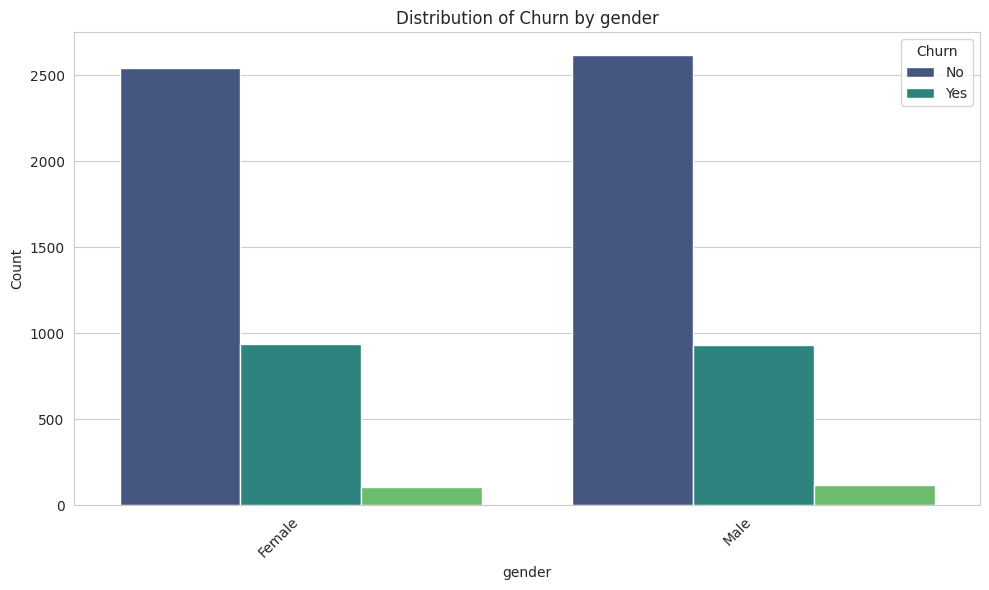

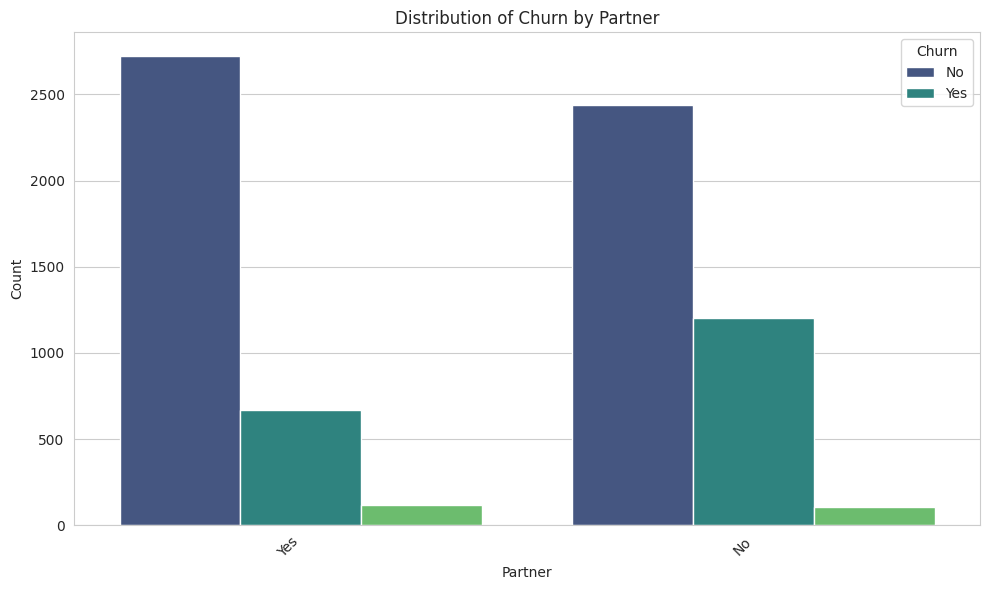

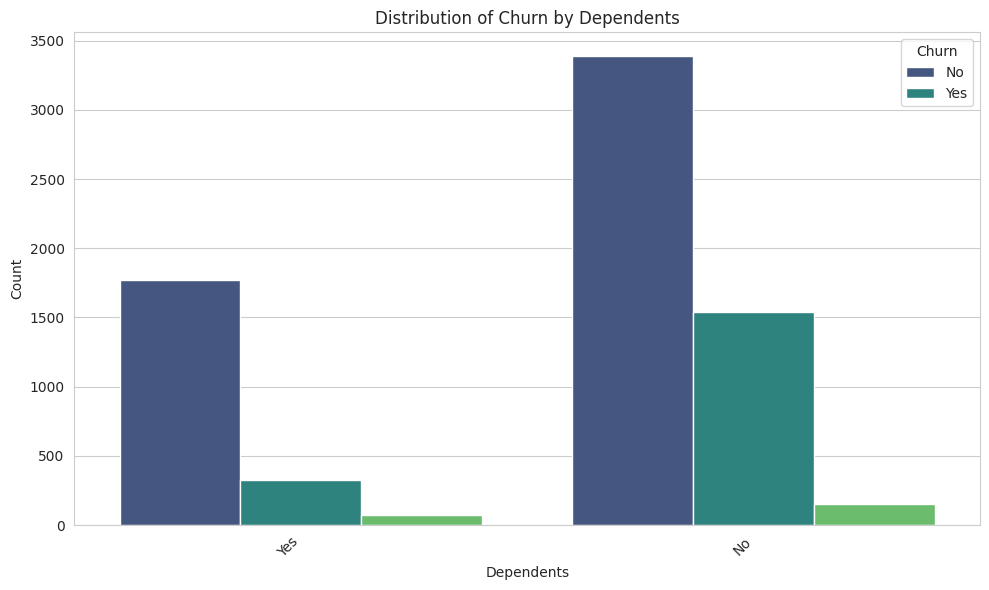

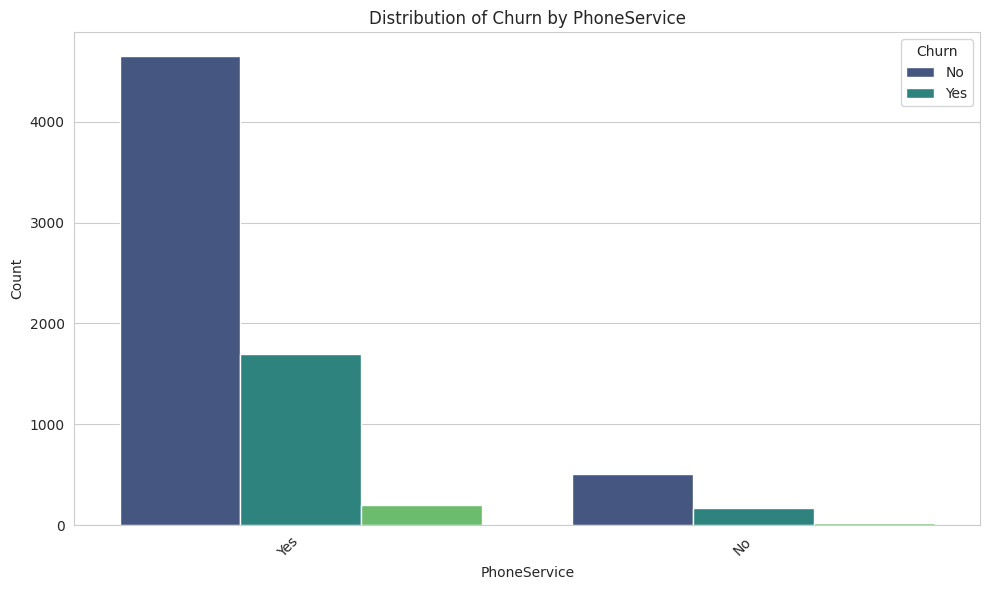

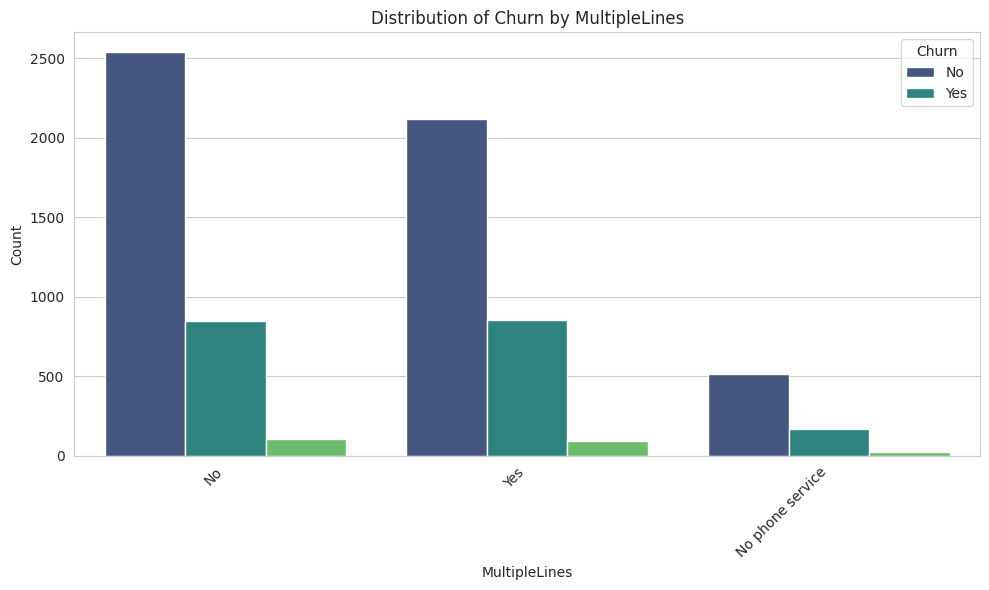

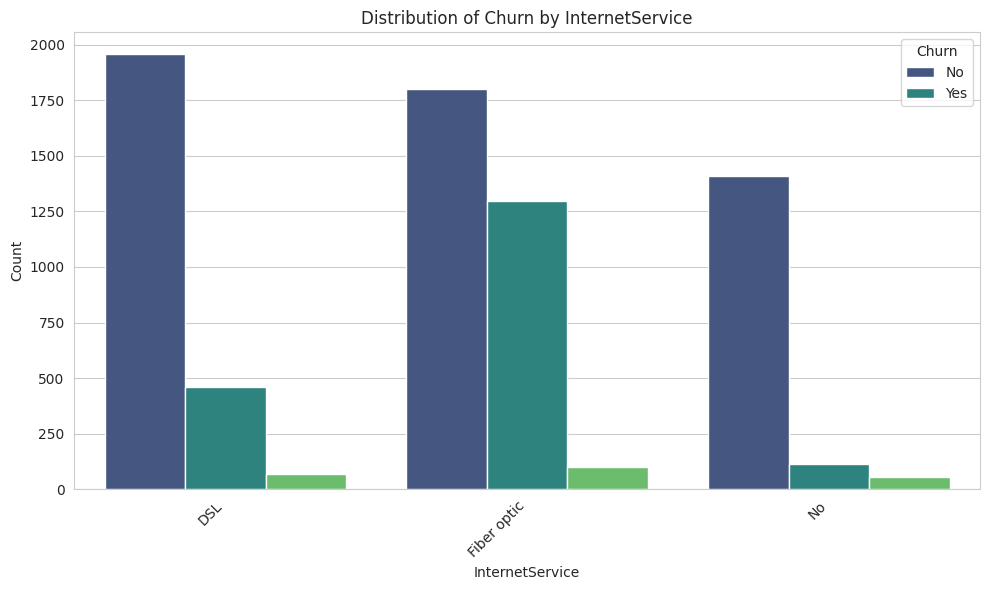

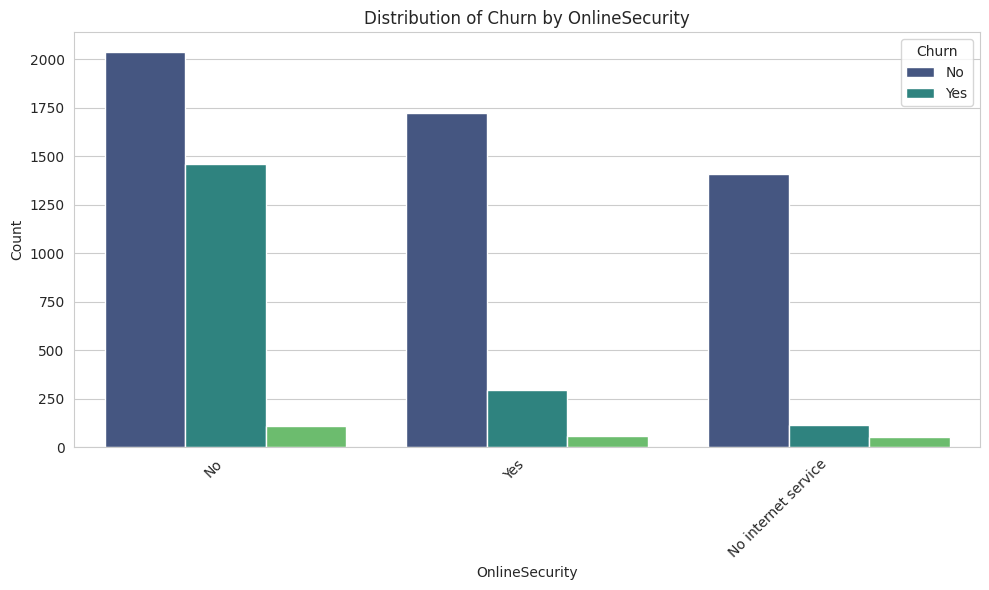

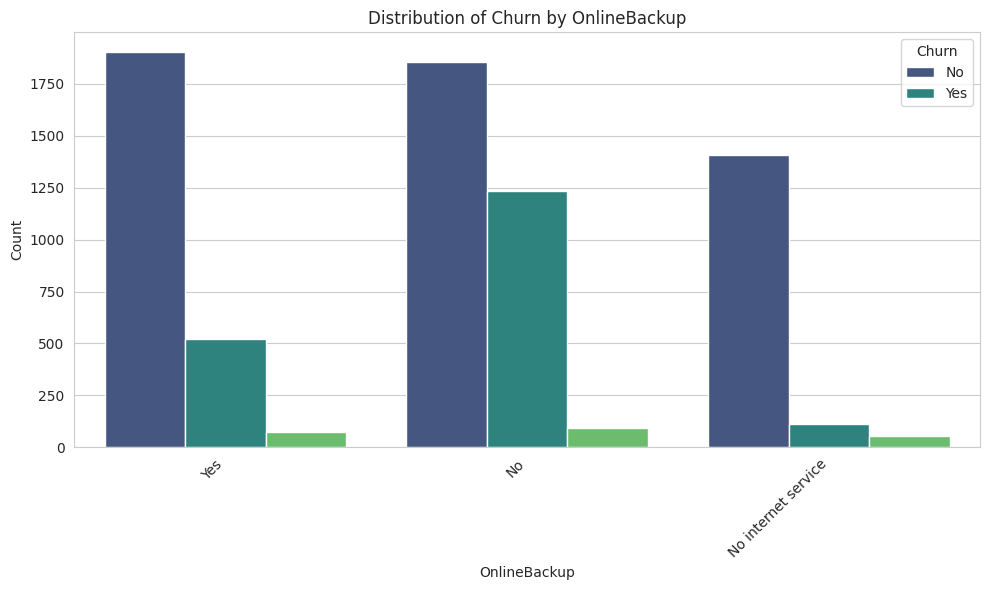

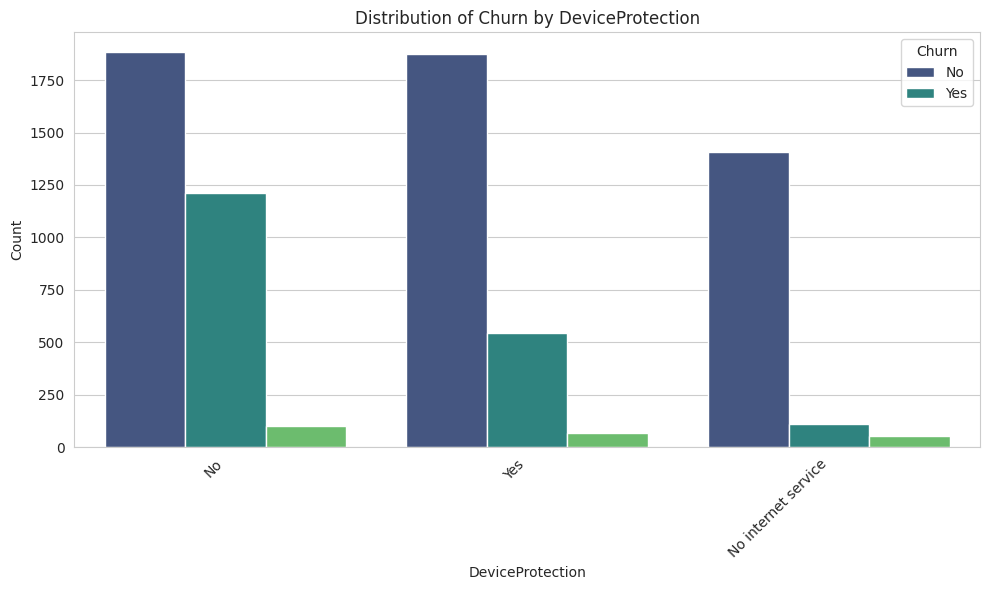

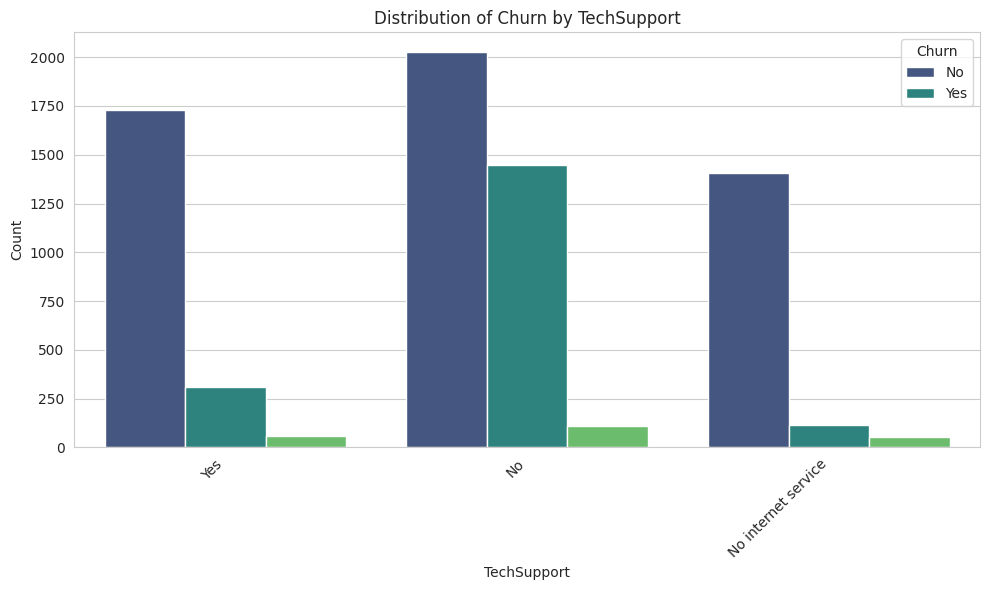

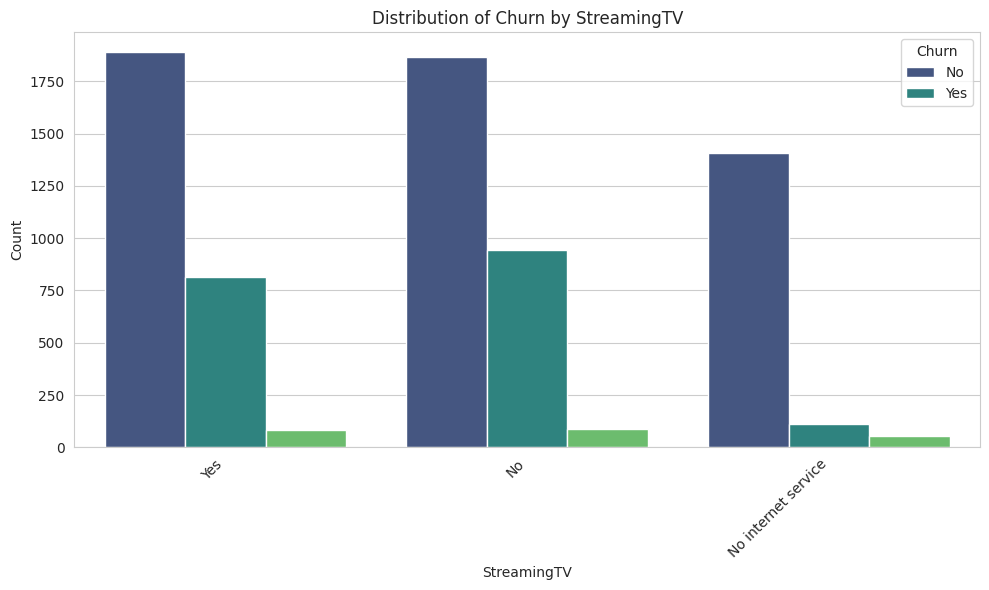

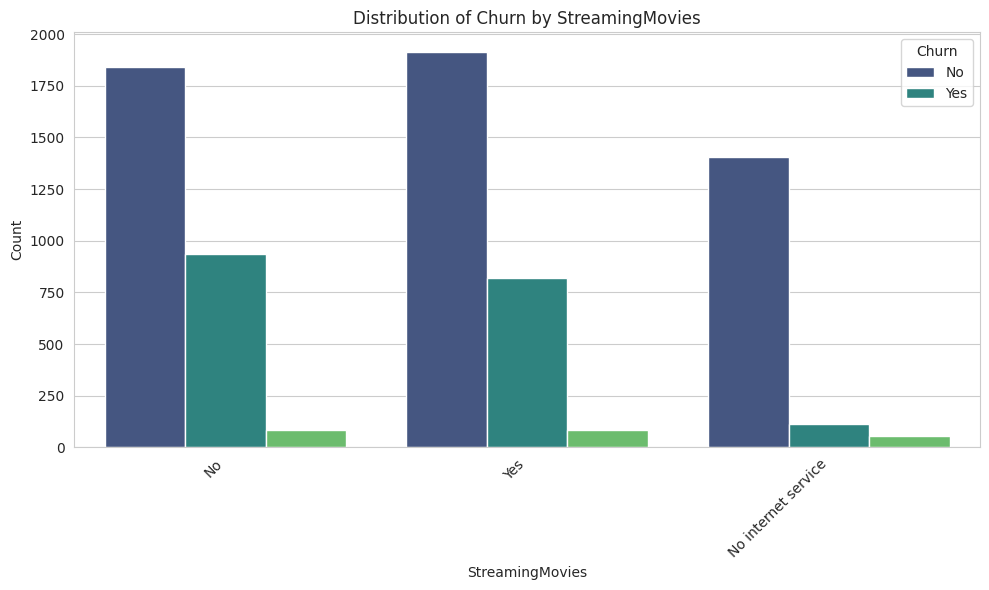

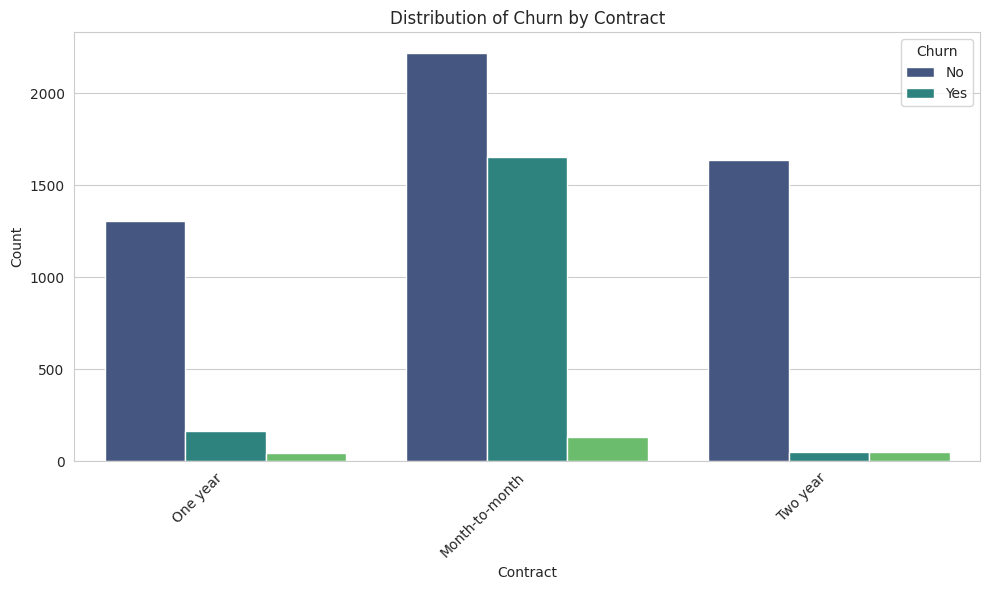

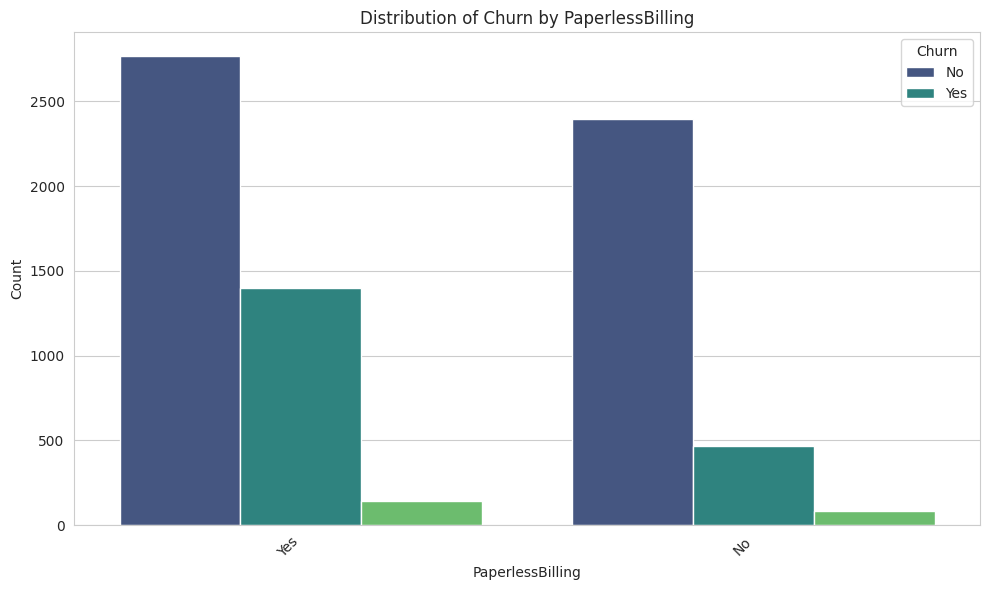

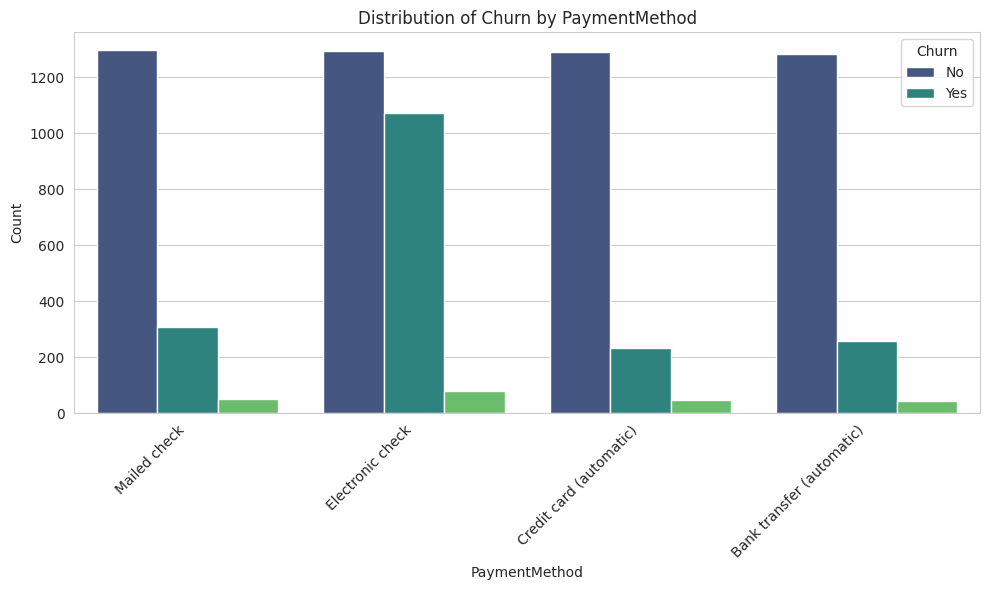

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Get the list of categorical columns to visualize
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude 'customerID' and 'Churn' from this list as we are analyzing against Churn
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

# Create bar plots for each categorical column against 'Churn'
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribution of Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Create the 'Cuentas_Diarias' column
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44

# Display the first few rows with the new column
display(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


#📊 Carga y análisis

In [ ]:
# Perform descriptive analysis on the DataFrame
display(df.describe())

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213,2.127314
std,0.3693,24.558067,30.125739,2268.632997,0.989676
min,0.0000,1.000000,18.250000,18.800000,0.599540
25%,0.0000,9.000000,35.450000,400.225000,1.164586
50%,0.0000,29.000000,70.300000,1391.000000,2.309461
75%,0.0000,55.000000,89.900000,3785.300000,2.953351
max,1.0000,72.000000,118.750000,8684.800000,3.901117


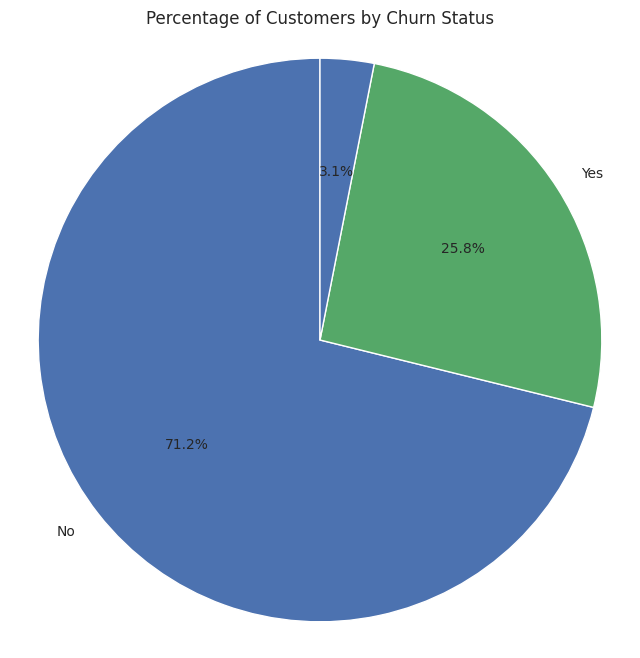

In [ ]:
# Calculate the percentage of churned and non-churned customers
churn_counts = df['Churn'].value_counts()
churn_percentages = churn_counts / len(df) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_percentages, labels=churn_percentages.index, autopct='%1.1f%%', startangle=90, colors=['#4c72b0', '#55a868'])
plt.title('Percentage of Customers by Churn Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

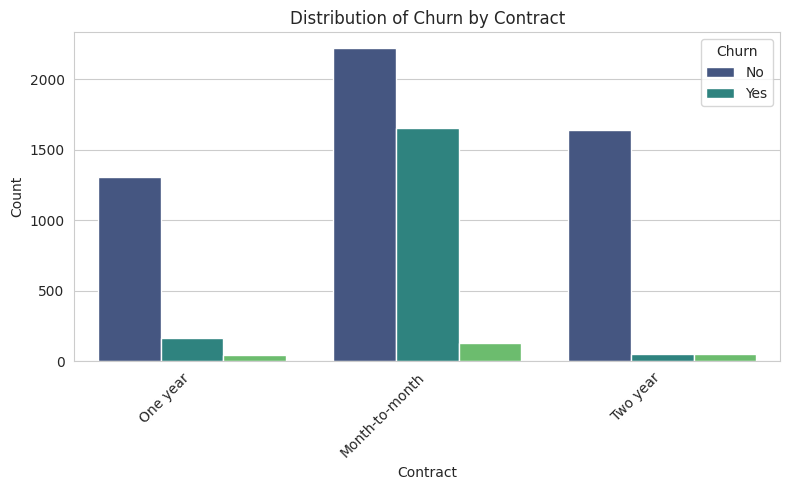

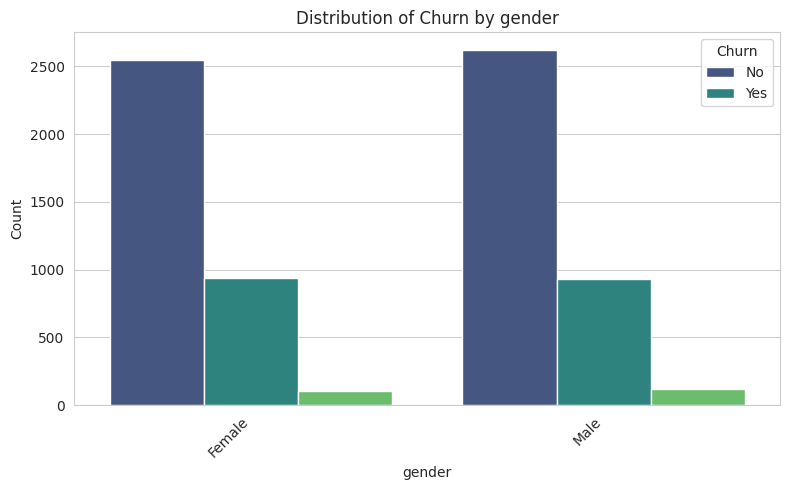

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create count plots for 'Contract' and 'gender' against 'Churn', focusing on 'Yes' churn
cols_to_plot = ['Contract', 'gender']

for col in cols_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'Distribution of Churn by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

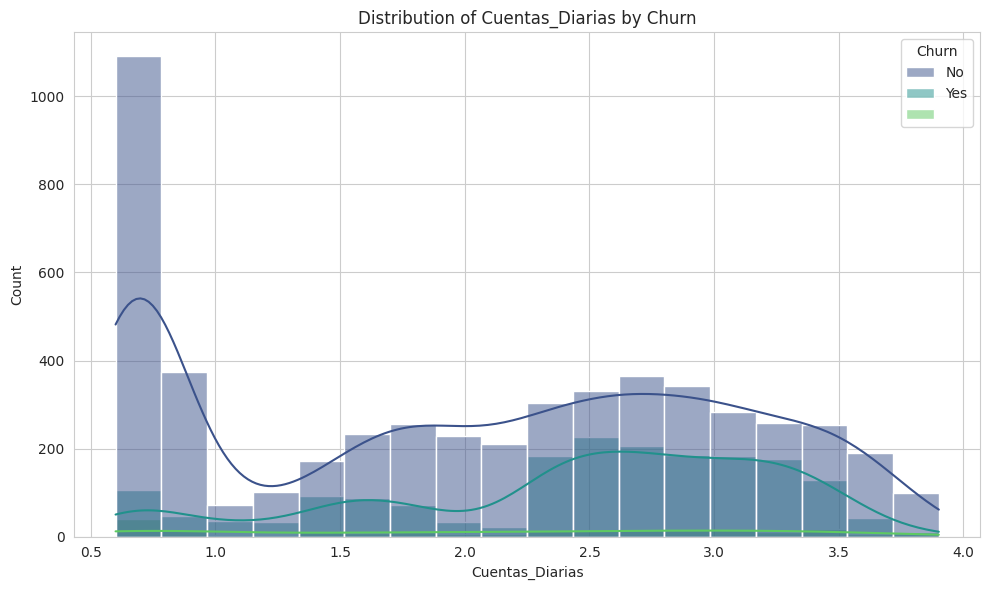

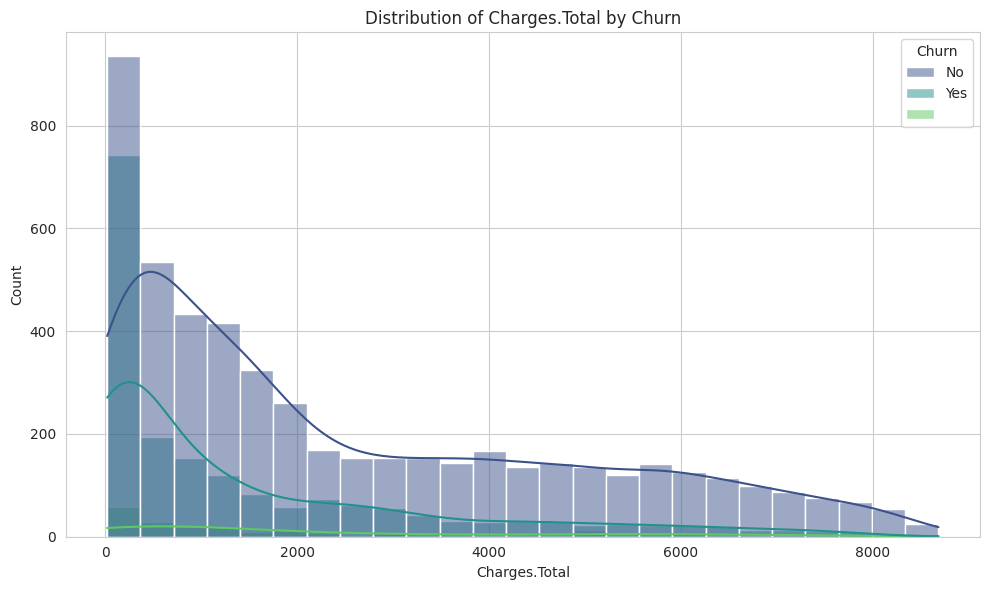

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

# Create histograms for 'Cuentas_Diarias' and 'Charges.Total' by 'Churn'
numerical_cols_to_plot = ['Cuentas_Diarias', 'Charges.Total']

for col in numerical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='viridis', common_norm=False)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

#📄Informe final

## 📄 Informe Final: Análisis de Deserción de Clientes en TelecomX

Este informe resume el análisis exploratorio realizado sobre el conjunto de datos de TelecomX con el objetivo de comprender los factores asociados a la deserción de clientes (Churn).

### 📊 Proporción de Clientes

Iniciamos nuestro análisis examinando la proporción general de clientes que se dieron de baja y los que permanecieron. El gráfico de torta mostró que un **25.8%** de los clientes en el conjunto de datos se dieron de baja, mientras que un **71.2%** permanecieron activos. Un pequeño porcentaje (3.1%) correspondió a datos que fueron limpiados durante la transformación.

### 💰 Comportamiento de Consumo

Analizamos el comportamiento de consumo a través de las columnas `Charges.Total` (cargos totales) y `Cuentas_Diarias` (facturación diaria). Observamos que:

*   Los clientes que se dieron de baja tienden a tener **cargos totales más bajos**, lo cual es coherente con el hecho de que estuvieron menos tiempo como clientes.
*   Al observar las `Cuentas_Diarias`, notamos que los clientes que se dieron de baja muestran una **mayor concentración en rangos de consumo diario más elevados** en comparación con los clientes que permanecieron. Esto sugiere que un alto consumo diario podría ser un indicador de riesgo de deserción.

### 📦 Servicios Adicionales

Si bien no analizamos directamente la *cantidad* de servicios de forma agregada, las visualizaciones por tipo de servicio (InternetService, OnlineSecurity, etc.) indicaron que algunos servicios están más asociados con la retención o la deserción. Por ejemplo, los clientes con servicio de Fibra Óptica (`Fiber optic`) mostraron una tasa de 'Churn' más alta que aquellos con DSL o sin servicio de internet.

### 🚻 Género

El análisis por género (`gender`) reveló que la distribución de la deserción es **bastante similar entre hombres y mujeres**. Esto sugiere que el género por sí solo no es un factor clave para predecir la deserción en este conjunto de datos.

### 📜 Tipo de Contrato

El tipo de contrato (`Contract`) emergió como una variable clave. Los clientes con contratos **Month-to-month** presentan una tasa de deserción significativamente **más alta** en comparación con aquellos con contratos de uno o dos años. Esto subraya la importancia de los contratos a largo plazo para la retención de clientes.

### Conclusiones Preliminares

Basado en este análisis exploratorio, variables como el **tipo de contrato** (particularmente Month-to-month), el **consumo diario elevado** y ciertos **tipos de servicios** (como Fibra Óptica) parecen estar más fuertemente asociados con la deserción de clientes. El género, por otro lado, no parece ser un factor diferenciador importante.

Estos hallazgos pueden ser valiosos para desarrollar estrategias de retención de clientes y para construir modelos predictivos de 'Churn'.

#📄Aplicación de Modelo Predictivo
#Comenzando la selección de columnas

In [1]:
# Drop the 'customerID' column as it is a unique identifier and not useful for modeling
df = df.drop('customerID', axis=1)

# Display the columns of the DataFrame to confirm the change
print("Columns after dropping 'customerID':")
print(df.columns)

NameError: name 'df' is not defined

In [2]:
import pandas as pd
import requests

# Define the URL of the JSON file
url = 'https://raw.githubusercontent.com/Beaebert/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Download the JSON data
response = requests.get(url)
data = response.json()

# Load the JSON data into a pandas DataFrame
df = pd.DataFrame(data)

# Expand the nested 'customer' column
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df, customer_df], axis=1)

# Expand the nested 'phone' column
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df, phone_df], axis=1)

# Expand the nested 'internet' column
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df, internet_df], axis=1)

# Expand the nested 'account' column
account_df = pd.json_normalize(df['account'])
df = pd.concat([df, account_df], axis=1)

# Drop the original nested columns
df = df.drop(['customer', 'phone', 'internet', 'account'], axis=1)

# Convert 'Charges.Total' to numeric, coercing errors to NaN
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Drop rows with NaN values in 'Charges.Total'
df.dropna(subset=['Charges.Total'], inplace=True)

# Create the 'Cuentas_Diarias' column
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44

# Drop the 'customerID' column as it is a unique identifier and not useful for modeling
df = df.drop('customerID', axis=1)

# Display the first few rows of the DataFrame and columns after dropping 'customerID'
print("Columns after dropping 'customerID':")
print(df.columns)
display(df.head())

Columns after dropping 'customerID':
Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155059
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967806
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427727
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219448
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756242


In [3]:
# Select categorical columns (excluding the target variable 'Churn')
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')

# Apply one-hot encoding to the selected categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows and the columns of the DataFrame after one-hot encoding
print("Columns after one-hot encoding:")
print(df.columns)
display(df.head())

Columns after one-hot encoding:
Index(['Churn', 'SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,9,65.6,593.30,2.155059,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,No,0,9,59.9,542.40,1.967806,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,Yes,0,4,73.9,280.85,2.427727,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,Yes,1,13,98.0,1237.85,3.219448,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,Yes,1,3,83.9,267.40,2.756242,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True
